In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from SpatialMetrics import AspectRatio
from StabilityMetrics import DeltaMetrics, ShneidermanWattenberg, LocationDrift
from Util import Parser

In [2]:
# Compute AR mean for all datasets in the sw_datasets.txt file
with open('../sw_datasets.txt') as f:
    datasets = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
datasets = [x.strip() for x in datasets]

In [3]:
# Compare Aspect Ratios first 

In [4]:
git_ar = []
sgi_ar = []

for dataset_id in datasets:
    history_git = Parser.parse_rectangles("git", dataset_id)
    history_sgi = Parser.parse_rectangles("sqrgit", dataset_id)
    
    all_ratios_git = np.array([])
    all_ratios_sgi = np.array([])
    
    for revision in range(len(history_git) - 1):
        ratios_git = AspectRatio.compute_aspect_ratios(history_git[revision])
        all_ratios_git = np.append(all_ratios_git, ratios_git.values)

        ratios_sgi = AspectRatio.compute_aspect_ratios(history_sgi[revision])
        all_ratios_sgi = np.append(all_ratios_sgi, ratios_sgi.values)

    git_ar.append(all_ratios_git.mean())
    sgi_ar.append(all_ratios_sgi.mean())

In [5]:
# Add average value after dataset values
index = np.arange(len(datasets))
avg_git = sum(git_ar) / len(git_ar)
avg_sgi = sum(sgi_ar) / len(sgi_ar)

git_ar.append(avg_git)
sgi_ar.append(avg_sgi)
index = np.append(index, 30)
datasets.append('AVERAGE')

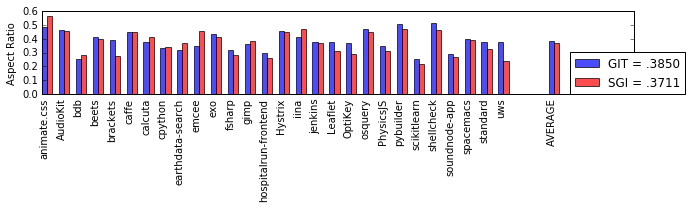

In [44]:
fig, ax = plt.subplots(figsize=(9, 3))
bar_width = 0.3
rects_git = plt.bar(index, git_ar, bar_width,
                 color='b',
                 alpha=.7,
                 edgecolor = "none",
                 label='GIT = ' + str(avg_git)[1:6])

rects_sgi = plt.bar(index + bar_width, sgi_ar, bar_width,
                 color='r',
                 alpha=.7,
                 edgecolor = "none",
                 label='SGI = ' + str(avg_sgi)[1:6])

plt.ylabel('Aspect Ratio')
plt.xticks(index + bar_width / 2, datasets, rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(.892,0), loc="lower left", borderaxespad=0)
plt.tight_layout()

plt.show()
fig.savefig('git-vs-sqrgit-ar.png', dpi=300, bbox_inches="tight")

In [7]:
print("AVG AR GIT =", avg_git)
print("AVG AR SGI =", avg_sgi)

AVG AR GIT = 0.385091210033
AVG AR SGI = 0.37114223557


In [8]:
# Compare Stability

In [21]:
git_mean_stab = []
sgi_mean_stab = []

for dataset_id in datasets:
    history_git = Parser.parse_rectangles("git", dataset_id)
    history_sgi = Parser.parse_rectangles("sqrgit", dataset_id)

    dataset_ratio_git = np.array([])
    dataset_shn_git = np.array([])
    dataset_ratio_sgi = np.array([])
    dataset_shn_sgi = np.array([])
    
    for revision in range(len(history_git) - 1):
        # Compute metrics for git
        delta_vis = DeltaMetrics.compute_delta_vis(history_git[revision], history_git[revision + 1])
        delta_data = DeltaMetrics.compute_delta_data(history_git[revision], history_git[revision + 1])
        ratios_git = (1 - delta_vis) / (1 - delta_data)
        dataset_ratio_git = np.append(dataset_ratio_git, ratios_git.values)
        
        shn_git = ShneidermanWattenberg.compute_shneiderman(history_git[revision], history_git[revision + 1])
        dataset_shn_git = np.append(dataset_shn_git, shn_git.values)
        
        # Compute metrics for sgi
        delta_vis = DeltaMetrics.compute_delta_vis(history_sgi[revision], history_sgi[revision + 1])
        delta_data = DeltaMetrics.compute_delta_data(history_sgi[revision], history_sgi[revision + 1])
        ratios_sgi = (1 - delta_vis) / (1 - delta_data)
        dataset_ratio_sgi = np.append(dataset_ratio_sgi, ratios_sgi.values)

        shn_sgi = ShneidermanWattenberg.compute_shneiderman(history_sgi[revision], history_sgi[revision + 1])
        dataset_shn_sgi = np.append(dataset_shn_sgi, shn_sgi.values)
        
        
    avg_drift_git = LocationDrift.compute_location_drift(history_git)
    avg_drift_sgi = LocationDrift.compute_location_drift(history_sgi)

    git_mean_stab.append((avg_drift_git + dataset_ratio_git.mean() + dataset_shn_git.mean())/3)
    sgi_mean_stab.append((avg_drift_sgi + dataset_ratio_sgi.mean() + dataset_shn_sgi.mean())/3)

/usr/lib/python3/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [30]:
git_mean_stab[-1] = sum(git_mean_stab[:-1])/ (len(git_mean_stab) - 1)
sgi_mean_stab[-1] = sum(sgi_mean_stab[:-1])/ (len(sgi_mean_stab) - 1)

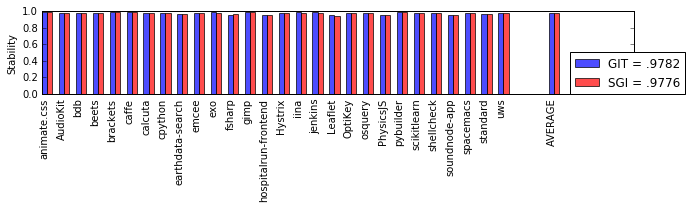

In [45]:
fig, ax = plt.subplots(figsize=(9, 3))
bar_width = 0.3
rects_git = plt.bar(index, git_mean_stab, bar_width,
                 color='b',
                 alpha=.7,
                 edgecolor = "none",
                 label='GIT = ' + str(git_mean_stab[-1])[1:6])

rects_sgi = plt.bar(index + bar_width, sgi_mean_stab, bar_width,
                 color='r',
                 alpha=.7,
                 edgecolor = "none",
                 label='SGI = ' + str(sgi_mean_stab[-1])[1:6])

plt.ylabel('Stability')
plt.xticks(index + bar_width / 2, datasets, rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(.892,0), loc="lower left", borderaxespad=0)
plt.tight_layout()

plt.show()
fig.savefig('git-vs-sqrgit-st.png', dpi=300, bbox_inches="tight")

In [36]:
print("AVG STAB GIT =", git_mean_stab[-1])
print("AVG STAB SGI =", sgi_mean_stab[-1])

AVG STAB GIT = 0.978241253894
AVG STAB SGI = 0.977617402437
